# MGE30301 Data Mining Homework 4

## K-means algorithm tutorial

### 20121229 JunPyo Park

### About Readme File

I put all instructions and working process here(jupyter notebook) clearly so I didn't make other readme file for my homework.

I use famous Iris dataset from sklearn package. <br>
First I made the code for the case k=3 and after doing this I made general function which is working for other k input. <br>
Using this function I calculated Cluster Quality Measure for different k and plot this result.

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
from sklearn import datasets
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
jtplot.style('grade3')

### Load Data

In [2]:
iris = datasets.load_iris() # load iris dataset

In [3]:
X = iris.data[:, :2] # select two features
X.shape

(150, 2)

### Data Visualization

In [4]:
trace = go.Scatter(
    x = X[:,0],
    y = X[:,1],
    name = 'Data_Point',
    mode = 'markers'
)

data = [trace]
fig = dict(data=data)
py.iplot(fig, filename='basic-scatter')

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed95bfb72bb45f20889bf/fb75b55735f7c79981a1ca59467a0210/image.png">

### Choose Initial Random Points (For the Case k=3)

In [5]:
# The number of clusters and data
k = 3
m = X.shape[0]

# ramdomly initialize mean points
mu = X[np.random.randint(0,m,k),:]
pre_mu = mu.copy()

print("Initial 3 Random Point")
print(mu)

Initial 3 Random Point
[[ 5.9  3. ]
 [ 5.4  3.9]
 [ 5.7  3. ]]


In [6]:
trace1 = go.Scatter(
    x = mu[:,0],
    y = mu[:,1],
    name = 'Initial_Random_Point',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace, trace1]

fig = dict(data=data)
py.iplot(fig, filename='add_initial_point')

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed95bfb72bb45f20889bf/368d29a94ba0a999ddaaeba0a0642885/image.png">

### Running K-means Algorithm

In [7]:
y = np.empty([m,1])
tolerance = 1e-15 # Setting the tolerance(stopping criteria), I arbitrarily put this value
iter_num = 0

while True:
    iter_num += 1
    for i in range(m):
        d0 = np.linalg.norm(X[i,:] - mu[0,:],2) # use 2-norm(Euclidean Distance) as a distance measure
        d1 = np.linalg.norm(X[i,:] - mu[1,:],2)
        d2 = np.linalg.norm(X[i,:] - mu[2,:],2)

        y[i] = np.argmin([d0, d1, d2]) # Choose the closest cluster
    
    err = 0
    for i in range(k): # Calculate the error
        mu[i,:] = np.mean(X[np.where(y == i)[0]], axis=0)
        err += np.linalg.norm(pre_mu[i,:] - mu[i,:],2)
    
    pre_mu = mu.copy()
    
    if err < tolerance:
        print("Iteration:", iter_num) # if stopping criteria is satisfied, break the loop and print iteration number
        break
        
    if iter_num > 9999:
        break

Iteration: 9


In [8]:
color_list = ['rgba(0, 230, 138, .9)','rgba(255, 102, 102, .9)', 'rgba(51, 133, 255, .9)' ]

data = []
for i in np.arange(3):
    trace = go.Scatter(
        x = X[np.where(y==i)[0]][:,0],
        y = X[np.where(y==i)[0]][:,1],
        name = 'Cluster_' + str(i+1),
        mode = 'markers',
        marker = dict(
            size = 10,
            color = color_list[i],
        )
    )
    data.append(trace)

fig = dict(data=data)
py.iplot(fig, filename='clustering_result')

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed95bfb72bb45f20889bf/787384a3900ab13599ca581d0046cbc2/image.png">

### Making the function for arbitrary k

In [126]:
def k_means(X,k):
    m = X.shape[0]

    # ramdomly initialize mean points
    mu = X[np.random.randint(0,m,k),:]
    pre_mu = mu.copy()
    y = np.empty([m,1])
    tolerance = 1e-15 # Setting the tolerance(stopping criteria), I arbitrarily put this value
    iter_num = 0

    while True:
        iter_num += 1
        for i in range(m):
            distance = []
            for j in range(k):
                distance.append(np.linalg.norm(X[i,:] - mu[j,:],2)) # use 2-norm(Euclidean Distance) as a distance measure
            y[i] = np.argmin(distance) # Choose the closest cluster

        err = 0
        for i in range(k): # Calculate the error
            mu[i,:] = np.mean(X[np.where(y == i)[0]], axis=0)
            err += np.linalg.norm(pre_mu[i,:] - mu[i,:],2)

        pre_mu = mu.copy()

        if err < tolerance:
            print("Iteration:", iter_num) # if stopping criteria is satisfied, break the loop and print iteration number
            data = []
            for i in np.arange(k):
                trace = go.Scatter(
                    x = X[np.where(y==i)[0]][:,0],
                    y = X[np.where(y==i)[0]][:,1],
                    name = 'Cluster_' + str(i+1),
                    mode = 'markers',
                    marker = dict(
                        size = 10,
                    )
                )
                data.append(trace)
            
            jagota_measure=0
            y = pd.Series(y[:,0])
            for i in range(m): # calculating Jagota Measure(Q measure)
                num = len(y.where(y==y[i]).dropna())
                jagota_measure += np.linalg.norm(X[i,:] - mu[int(y[i]),:],2) / num
            
            fig = dict(data=data)
            return(fig,jagota_measure)
            
            break

        if iter_num > 9999:
            break   

### Result for k=3

In [132]:
py.iplot(k_means(X,3)[0])

Iteration: 8


<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed95bfb72bb45f20889bf/e7ee130f53ae3d547b7453a14517a113/image.png">

Jagota Measure for k=3

In [130]:
k_means(X,3)[1]

Iteration: 10


1.2582208225490474

### Result for k=5

In [98]:
py.iplot(k_means(X,5))

Iteration: 7


<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed95bfb72bb45f20889bf/ed61d37dfcb38beb5b9a24569ffae079/image.png">

Jagota Measure for k=5

In [168]:
k_means(X,5)[1]

Iteration: 7


1.7060376729133013

### Plot Q measure for different k

In [161]:
x = np.arange(6)+2
y = []
for k in x:
    y.append(k_means(X,k)[1])      

Iteration: 8
Iteration: 9
Iteration: 7
Iteration: 12
Iteration: 8
Iteration: 8


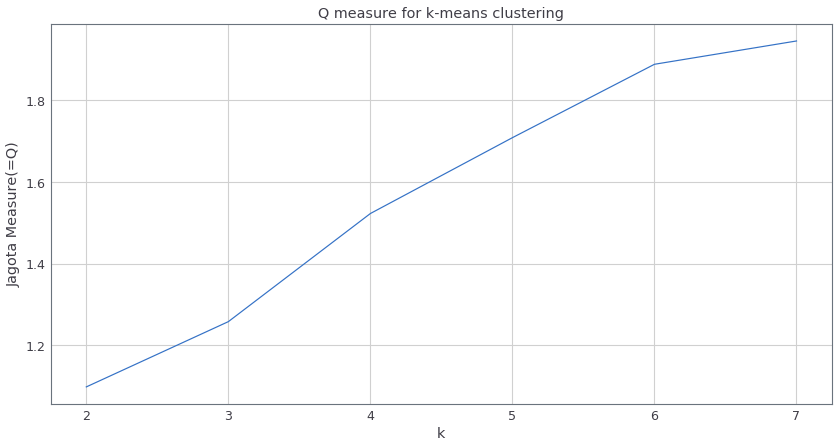

In [167]:
plt.figure(figsize=(14,7))
plt.title('Q measure for k-means clustering')
plt.xlabel('k')
plt.ylabel('Jagota Measure(=Q)')
plt.plot(x,y)
plt.show()